In [160]:
import json
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sn

In [161]:
font_path = "C:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [162]:
tpFileName = 'data/서울특별시_관광지입장정보_2011_2016.json'

#json을 불러오는법
jsonTP = json.loads(open(tpFileName, 'r', encoding='utf-8').read())
#불러온 데이터(yyyymm, resNm, ForNum)을 데이터 프레임에 담음
tour_table = pd.DataFrame(jsonTP, columns=('yyyymm', 'resNm', 'ForNum'))
tour_table = tour_table.set_index('yyyymm')
tour_table[:30]

,resNm,ForNum
yyyymm,,
201101,창덕궁,14137
201101,운현궁,0
201101,경복궁,40224
201101,창경궁,697
201101,종묘,6837
201101,국립중앙박물관,0
201101,서울역사박물관,0
201101,덕수궁,5743
201101,서울시립미술관 본관,0


In [163]:
resNm=tour_table.resNm.unique()
resNm

array(['창덕궁', '운현궁', '경복궁', '창경궁', '종묘', '국립중앙박물관', '서울역사박물관', '덕수궁',
       '서울시립미술관 본관', '태릉 ·  강릉 · 조선왕릉전시관', '서대문형무소역사관', '서대문자연사박물관',
       '트릭아이미술관', '헌릉ㆍ인릉', '선릉·정릉', '롯데월드'], dtype=object)

In [164]:
fv_cFileName = 'data/중국(112)_해외방문객정보_2011_2016.json'

#json을 불러오는법
jsonFV = json.loads(open(fv_cFileName, 'r', encoding='utf-8').read())
#불러온 데이터(yyyymm, resNm, ForNum)을 데이터 프레임에 담음
china_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
china_table = china_table.rename(columns={'visit_cnt':'china'})
china_table = china_table.set_index('yyyymm')
china_table[:30]

,china
yyyymm,
201101,91252
201102,140571
201103,141457
201104,147680
201105,154066
201106,150119
201107,195188
201108,241987
201109,176196


In [165]:
fv_jFileName = 'data/일본(130)_해외방문객정보_2011_2016.json'

#json을 불러오는법
jsonFV = json.loads(open(fv_jFileName, 'r', encoding='utf-8').read())
#불러온 데이터(yyyymm, resNm, ForNum)을 데이터 프레임에 담음
japan_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
japan_table = japan_table.rename(columns={'visit_cnt':'japan'})
japan_table = japan_table.set_index('yyyymm')
japan_table[:30]

,japan
yyyymm,
201101,209184
201102,230362
201103,306126
201104,239075
201105,241695
201106,231718
201107,227541
201108,262157
201109,267886


In [166]:
fv_usaFileName = 'data/미국(275)_해외방문객정보_2011_2016.json'

#json을 불러오는법
jsonFV = json.loads(open(fv_usaFileName, 'r', encoding='utf-8').read())
#불러온 데이터(yyyymm, resNm, ForNum)을 데이터 프레임에 담음
usa_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
usa_table = usa_table.rename(columns={'visit_cnt':'usa'})
usa_table = usa_table.set_index('yyyymm')
usa_table[:30]

,usa
yyyymm,
201101,43065
201102,41077
201103,54610
201104,59616
201105,59780
201106,64412
201107,59443
201108,56377
201109,56304


In [167]:
fv_table = pd.merge(japan_table, china_table, left_index=True, right_index=True)
fv_table

,japan,china
yyyymm,,
201101,209184,91252
201102,230362,140571
201103,306126,141457
201104,239075,147680
201105,241695,154066
...,...,...
201608,148632,513275
201609,157313,591242
201610,180348,650174


In [168]:

fv_table = pd.merge(fv_table, usa_table, left_index=True, right_index=True)
fv_table

,japan,china,usa
yyyymm,,,
201101,209184,91252,43065
201102,230362,140571,41077
201103,306126,141457,54610
201104,239075,147680,59616
201105,241695,154066,59780
...,...,...,...
201608,148632,513275,63522
201609,157313,591242,63793
201610,180348,650174,77878


In [169]:
def setScatterGraph(tour_table, fv_table, tourpoint):
    tour = tour_table[tour_table['resNm']==tourpoint]
    merge_table = pd.merge(tour, fv_table, left_index=True, right_index=True)
    # print(merge_table)

    fig=plt.figure()
    fig.suptitle(tourpoint+" 상관관계 분석")
    
    plt.subplot(1,3,1)
    plt.xlabel('중국인 입국자수', fontsize=8)
    plt.ylabel('외국인 입장객수', fontsize=8)
    r1=merge_table.china.corr(merge_table.ForNum)
    plt.title('r={:.5f}'.format(r1))
    plt.scatter(list(merge_table['china']),list(merge_table['ForNum']), edgecolor='None', alpha=0.75, s=6, c='black')

    plt.subplot(1,3,2)
    plt.xlabel('일본인 입국자수')
    plt.ylabel('외국인 입장객수')
    r2=merge_table.japan.corr(merge_table.ForNum)
    plt.title('r={:.5f}'.format(r2))
    plt.scatter(list(merge_table['japan']),list(merge_table['ForNum']), edgecolor='None', alpha=0.75, s=6, c='black')
    
    plt.subplot(1,3,3)
    plt.xlabel('미국인 입국자수')
    plt.ylabel('외국인 입장객수')
    r3=merge_table.usa.corr(merge_table.ForNum)
    plt.title('r={:.5f}'.format(r3))
    plt.scatter(list(merge_table['usa']),list(merge_table['ForNum']), edgecolor='None', alpha=0.75, s=6, c='black')

    plt.subplots_adjust(wspace=1)
    plt.tight_layout
    plt.show()
    return  [tour_table, r1, r2, r3]


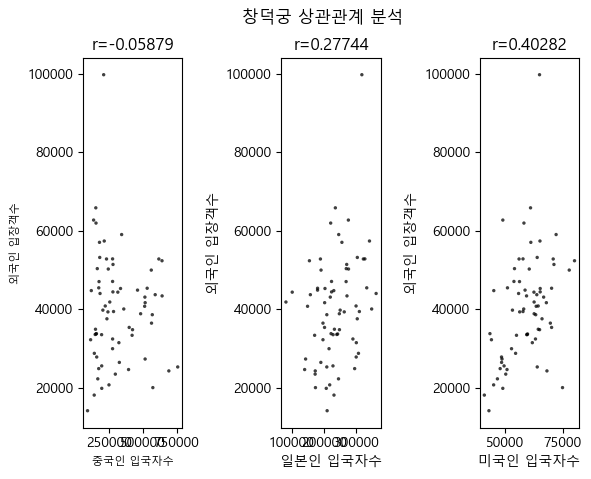

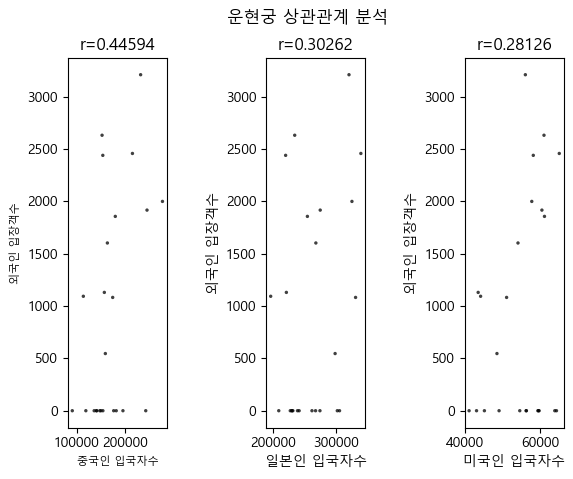

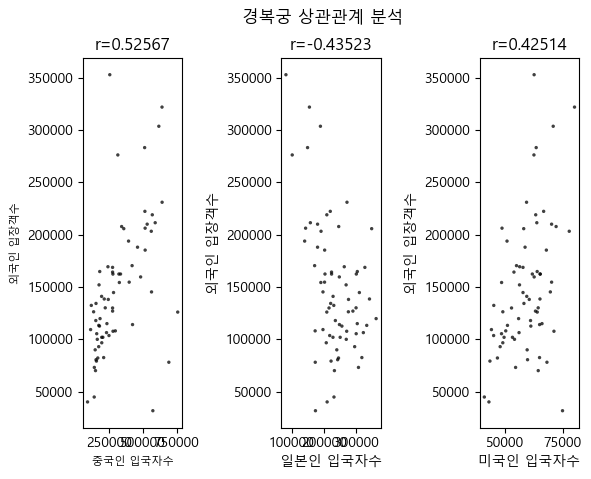

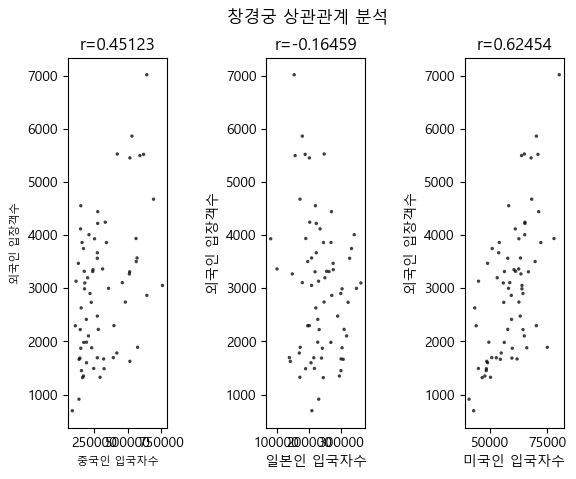

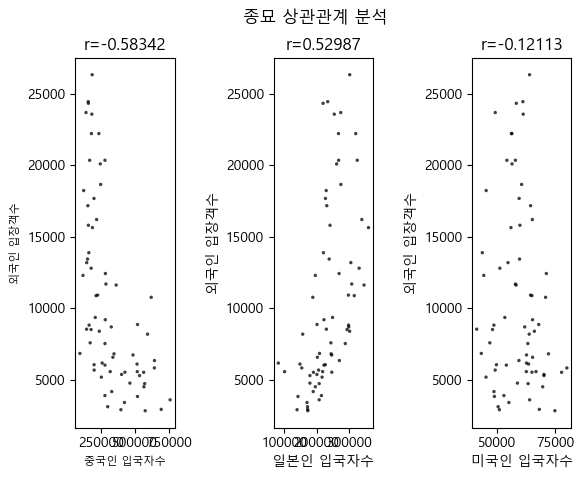

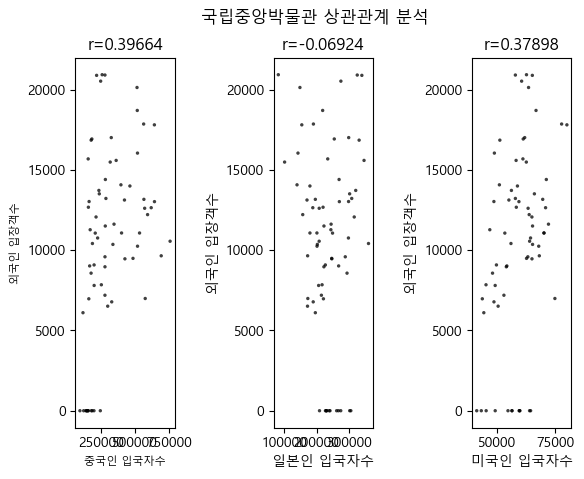

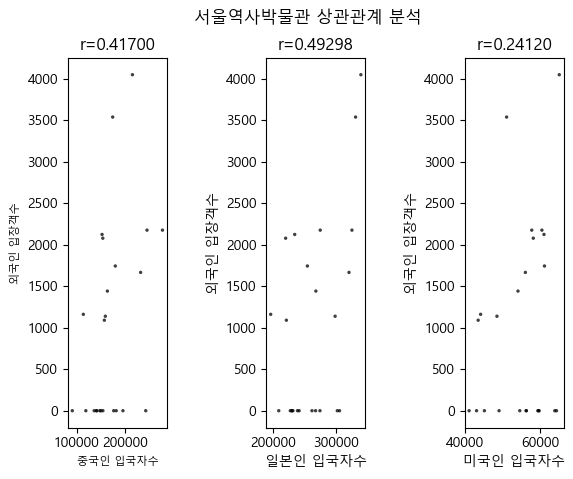

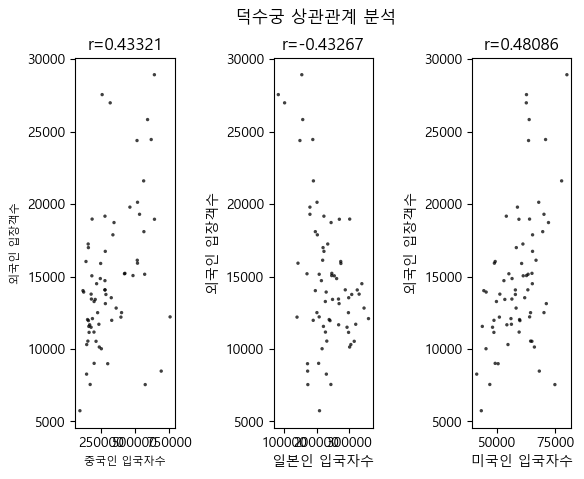

c:\Users\it\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


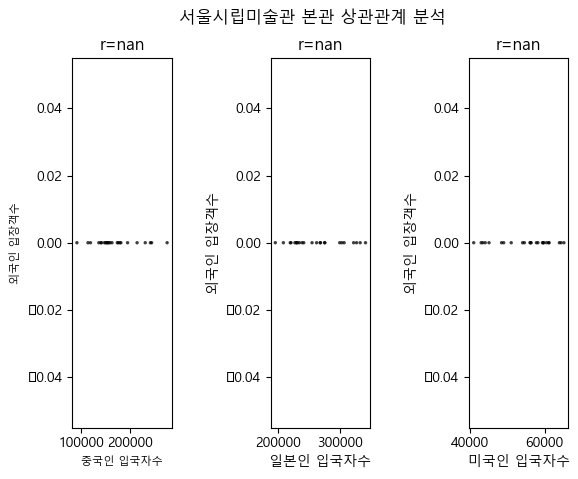

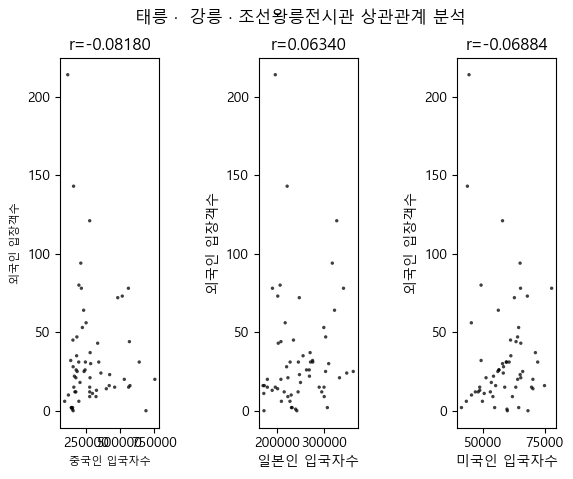

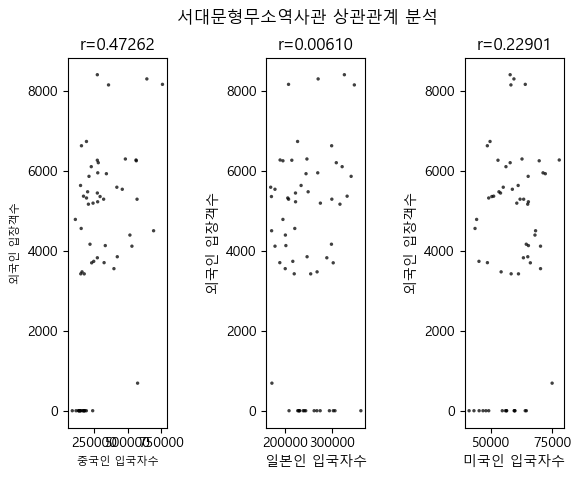

c:\Users\it\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


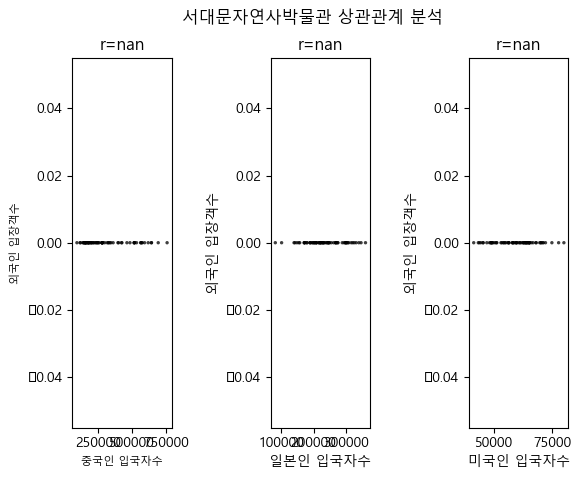

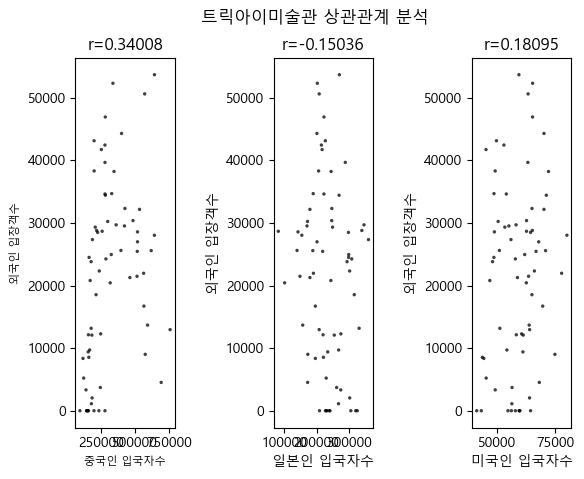

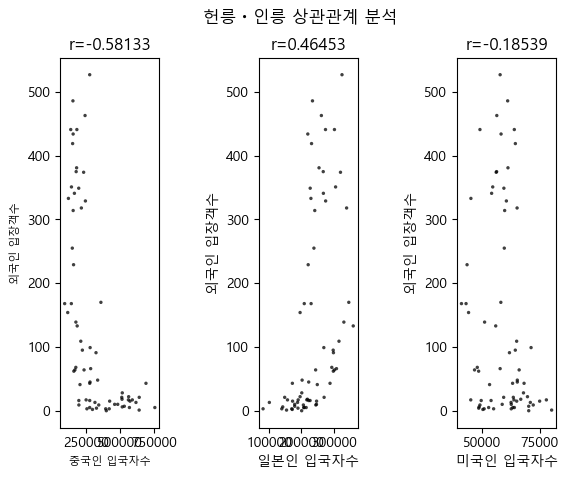

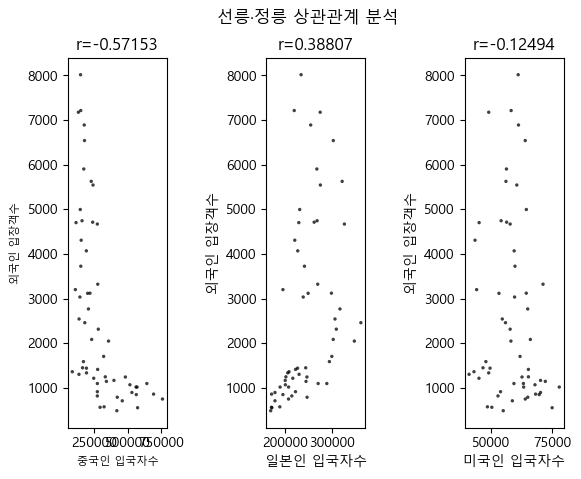

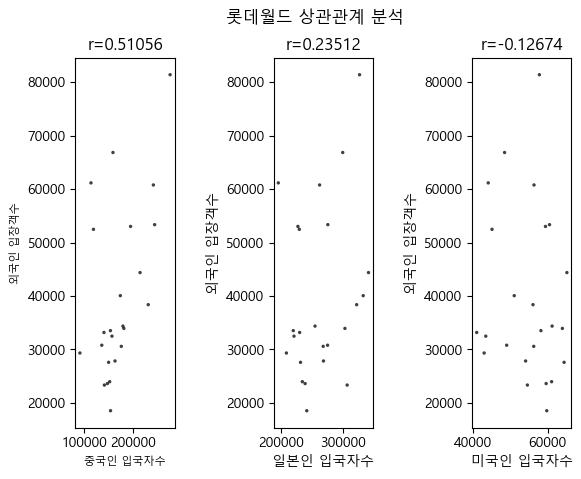

,tourpoint,china,japan,usa
0,resNm ForNum yyyymm ...,-0.058791,0.277444,0.402816
1,resNm ForNum yyyymm ...,0.445945,0.302615,0.281258
2,resNm ForNum yyyymm ...,0.525673,-0.435228,0.425137
3,resNm ForNum yyyymm ...,0.451233,-0.164586,0.624540
4,resNm ForNum yyyymm ...,-0.583422,0.529870,-0.121127
5,resNm ForNum yyyymm ...,0.396636,-0.069239,0.378979
6,resNm ForNum yyyymm ...,0.416999,0.492978,0.241198
7,resNm ForNum yyyymm ...,0.433213,-0.432672,0.480859
8,resNm ForNum yyyymm ...,NaN,NaN,NaN
9,resNm ForNum yyyymm ...,-0.081799,0.063403,-0.068840


In [171]:
r_list=[]
for tourpoint in resNm:
    r_list.append(setScatterGraph(tour_table, fv_table, tourpoint))

r_table=pd.DataFrame(r_list, columns=('tourpoint','china','japan','usa'))
r_table